In [1]:
import torch
from dagma import utils
from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear
from sklearn.metrics import accuracy_score
import utils.n_fold_cv

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df3 = pd.read_csv("Data\\train_data_3sec.csv", header=0)

# Extract features and labels
features = df3.iloc[:, 2:-1].values  # Assuming your features start from the second column

labels = df3.iloc[:, -1].values
#blues = features[labels == "blues"]
#print(blues.shape)
# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = features#np.array(blues, dtype=np.float32)
print(numeric_labels.shape)
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_array)


(7994,)


In [3]:
names = ["title"]
for j in range(1,11):
    names += [f"({j},{i})" for i in range(1, 11-j+1)] 
names = names + list(range(12)) + ["label"]
print(names)
# Skip the first line and load the data into a pandas DataFrame
df = pd.read_csv("Data/train_features.csv", skiprows=1, header=None, names=names)

# Display the DataFrame
df.columns = df.columns.astype(str)

['title', '(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)', '(1,6)', '(1,7)', '(1,8)', '(1,9)', '(1,10)', '(2,1)', '(2,2)', '(2,3)', '(2,4)', '(2,5)', '(2,6)', '(2,7)', '(2,8)', '(2,9)', '(3,1)', '(3,2)', '(3,3)', '(3,4)', '(3,5)', '(3,6)', '(3,7)', '(3,8)', '(4,1)', '(4,2)', '(4,3)', '(4,4)', '(4,5)', '(4,6)', '(4,7)', '(5,1)', '(5,2)', '(5,3)', '(5,4)', '(5,5)', '(5,6)', '(6,1)', '(6,2)', '(6,3)', '(6,4)', '(6,5)', '(7,1)', '(7,2)', '(7,3)', '(7,4)', '(8,1)', '(8,2)', '(8,3)', '(9,1)', '(9,2)', '(10,1)', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'label']


In [4]:
file_names = df3.iloc[:,0].values
categories = np.array(['.'.join(name.split('.')[:2]) for name in file_names])#file_names_unique = 
unique_values, counts = np.unique(categories, return_counts=True)
unique_categories_with_indices = list(enumerate(unique_values))
first_instance_indices = {category: np.where(categories == category)[0][0] for category in unique_values}
counts_dict = dict(zip(range(len(unique_values)), [(count, first_instance_indices[category]) for category, count in zip(unique_values, counts)]))
print(counts_dict)

{0: (10, 0), 1: (10, 10), 2: (10, 20), 3: (10, 30), 4: (10, 40), 5: (10, 50), 6: (10, 60), 7: (10, 70), 8: (10, 80), 9: (10, 90), 10: (10, 100), 11: (10, 110), 12: (10, 120), 13: (10, 130), 14: (10, 140), 15: (10, 150), 16: (10, 160), 17: (10, 170), 18: (10, 180), 19: (10, 190), 20: (10, 200), 21: (10, 210), 22: (10, 220), 23: (10, 230), 24: (10, 240), 25: (10, 250), 26: (10, 260), 27: (10, 270), 28: (10, 280), 29: (10, 290), 30: (10, 300), 31: (10, 310), 32: (10, 320), 33: (10, 330), 34: (10, 340), 35: (10, 350), 36: (10, 360), 37: (10, 370), 38: (10, 380), 39: (10, 390), 40: (10, 400), 41: (10, 410), 42: (10, 420), 43: (10, 430), 44: (10, 440), 45: (10, 450), 46: (10, 460), 47: (10, 470), 48: (10, 480), 49: (10, 490), 50: (10, 500), 51: (10, 510), 52: (10, 520), 53: (10, 530), 54: (10, 540), 55: (10, 550), 56: (10, 560), 57: (10, 570), 58: (10, 580), 59: (10, 590), 60: (10, 600), 61: (10, 610), 62: (10, 620), 63: (10, 630), 64: (10, 640), 65: (10, 650), 66: (10, 660), 67: (10, 670), 

In [5]:
indices = []
for key, value in counts_dict.items():
    index = key
    count, first_instance_index = value
    # cameron's data has everything,
    indices +=[index * 10 + i for i in range(count)]
df_same_samples = df.iloc[indices, :]
df_same_samples.reset_index(drop=True, inplace=True)
# test to see if we matched samples correctly
for index, row in df_same_samples.iterrows():   
    print(row["title"].split("."),df3["filename"][index].split("."))
    assert row["title"].split(".")[0] == df3["filename"][index].split(".")[0]
    for i in range(2,3):
        assert int(row["title"].split(".")[i]) == int(df3["filename"][index].split(".")[i])
    
print(df_same_samples)
merged_df = pd.concat([df3.iloc[:, 0],df_same_samples.iloc[:, 1:], df3.iloc[:, 1:-1]], axis=1)

print(merged_df.columns)

['blues', '0', '0'] ['blues', '00000', '0', 'wav']
['blues', '0', '1'] ['blues', '00000', '1', 'wav']
['blues', '0', '2'] ['blues', '00000', '2', 'wav']
['blues', '0', '3'] ['blues', '00000', '3', 'wav']
['blues', '0', '4'] ['blues', '00000', '4', 'wav']
['blues', '0', '5'] ['blues', '00000', '5', 'wav']
['blues', '0', '6'] ['blues', '00000', '6', 'wav']
['blues', '0', '7'] ['blues', '00000', '7', 'wav']
['blues', '0', '8'] ['blues', '00000', '8', 'wav']
['blues', '0', '9'] ['blues', '00000', '9', 'wav']
['blues', '1', '0'] ['blues', '00001', '0', 'wav']
['blues', '1', '1'] ['blues', '00001', '1', 'wav']
['blues', '1', '2'] ['blues', '00001', '2', 'wav']
['blues', '1', '3'] ['blues', '00001', '3', 'wav']
['blues', '1', '4'] ['blues', '00001', '4', 'wav']
['blues', '1', '5'] ['blues', '00001', '5', 'wav']
['blues', '1', '6'] ['blues', '00001', '6', 'wav']
['blues', '1', '7'] ['blues', '00001', '7', 'wav']
['blues', '1', '8'] ['blues', '00001', '8', 'wav']
['blues', '1', '9'] ['blues', '

['blues', '62', '0'] ['blues', '00062', '0', 'wav']
['blues', '62', '1'] ['blues', '00062', '1', 'wav']
['blues', '62', '2'] ['blues', '00062', '2', 'wav']
['blues', '62', '3'] ['blues', '00062', '3', 'wav']
['blues', '62', '4'] ['blues', '00062', '4', 'wav']
['blues', '62', '5'] ['blues', '00062', '5', 'wav']
['blues', '62', '6'] ['blues', '00062', '6', 'wav']
['blues', '62', '7'] ['blues', '00062', '7', 'wav']
['blues', '62', '8'] ['blues', '00062', '8', 'wav']
['blues', '62', '9'] ['blues', '00062', '9', 'wav']
['blues', '63', '0'] ['blues', '00063', '0', 'wav']
['blues', '63', '1'] ['blues', '00063', '1', 'wav']
['blues', '63', '2'] ['blues', '00063', '2', 'wav']
['blues', '63', '3'] ['blues', '00063', '3', 'wav']
['blues', '63', '4'] ['blues', '00063', '4', 'wav']
['blues', '63', '5'] ['blues', '00063', '5', 'wav']
['blues', '63', '6'] ['blues', '00063', '6', 'wav']
['blues', '63', '7'] ['blues', '00063', '7', 'wav']
['blues', '63', '8'] ['blues', '00063', '8', 'wav']
['blues', '6

['blues', '92', '0'] ['blues', '00092', '0', 'wav']
['blues', '92', '1'] ['blues', '00092', '1', 'wav']
['blues', '92', '2'] ['blues', '00092', '2', 'wav']
['blues', '92', '3'] ['blues', '00092', '3', 'wav']
['blues', '92', '4'] ['blues', '00092', '4', 'wav']
['blues', '92', '5'] ['blues', '00092', '5', 'wav']
['blues', '92', '6'] ['blues', '00092', '6', 'wav']
['blues', '92', '7'] ['blues', '00092', '7', 'wav']
['blues', '92', '8'] ['blues', '00092', '8', 'wav']
['blues', '92', '9'] ['blues', '00092', '9', 'wav']
['blues', '93', '0'] ['blues', '00093', '0', 'wav']
['blues', '93', '1'] ['blues', '00093', '1', 'wav']
['blues', '93', '2'] ['blues', '00093', '2', 'wav']
['blues', '93', '3'] ['blues', '00093', '3', 'wav']
['blues', '93', '4'] ['blues', '00093', '4', 'wav']
['blues', '93', '5'] ['blues', '00093', '5', 'wav']
['blues', '93', '6'] ['blues', '00093', '6', 'wav']
['blues', '93', '7'] ['blues', '00093', '7', 'wav']
['blues', '93', '8'] ['blues', '00093', '8', 'wav']
['blues', '9

['classical', '32', '1'] ['classical', '00032', '1', 'wav']
['classical', '32', '2'] ['classical', '00032', '2', 'wav']
['classical', '32', '3'] ['classical', '00032', '3', 'wav']
['classical', '32', '4'] ['classical', '00032', '4', 'wav']
['classical', '32', '5'] ['classical', '00032', '5', 'wav']
['classical', '32', '6'] ['classical', '00032', '6', 'wav']
['classical', '32', '7'] ['classical', '00032', '7', 'wav']
['classical', '32', '8'] ['classical', '00032', '8', 'wav']
['classical', '32', '9'] ['classical', '00032', '9', 'wav']
['classical', '33', '0'] ['classical', '00033', '0', 'wav']
['classical', '33', '1'] ['classical', '00033', '1', 'wav']
['classical', '33', '2'] ['classical', '00033', '2', 'wav']
['classical', '33', '3'] ['classical', '00033', '3', 'wav']
['classical', '33', '4'] ['classical', '00033', '4', 'wav']
['classical', '33', '5'] ['classical', '00033', '5', 'wav']
['classical', '33', '6'] ['classical', '00033', '6', 'wav']
['classical', '33', '7'] ['classical', '

['classical', '67', '1'] ['classical', '00067', '1', 'wav']
['classical', '67', '2'] ['classical', '00067', '2', 'wav']
['classical', '67', '3'] ['classical', '00067', '3', 'wav']
['classical', '67', '4'] ['classical', '00067', '4', 'wav']
['classical', '67', '5'] ['classical', '00067', '5', 'wav']
['classical', '67', '6'] ['classical', '00067', '6', 'wav']
['classical', '67', '7'] ['classical', '00067', '7', 'wav']
['classical', '67', '8'] ['classical', '00067', '8', 'wav']
['classical', '67', '9'] ['classical', '00067', '9', 'wav']
['classical', '68', '0'] ['classical', '00068', '0', 'wav']
['classical', '68', '1'] ['classical', '00068', '1', 'wav']
['classical', '68', '2'] ['classical', '00068', '2', 'wav']
['classical', '68', '3'] ['classical', '00068', '3', 'wav']
['classical', '68', '4'] ['classical', '00068', '4', 'wav']
['classical', '68', '5'] ['classical', '00068', '5', 'wav']
['classical', '68', '6'] ['classical', '00068', '6', 'wav']
['classical', '68', '7'] ['classical', '

['country', '17', '3'] ['country', '00017', '3', 'wav']
['country', '17', '4'] ['country', '00017', '4', 'wav']
['country', '17', '5'] ['country', '00017', '5', 'wav']
['country', '17', '6'] ['country', '00017', '6', 'wav']
['country', '17', '7'] ['country', '00017', '7', 'wav']
['country', '17', '8'] ['country', '00017', '8', 'wav']
['country', '17', '9'] ['country', '00017', '9', 'wav']
['country', '19', '0'] ['country', '00019', '0', 'wav']
['country', '19', '1'] ['country', '00019', '1', 'wav']
['country', '19', '2'] ['country', '00019', '2', 'wav']
['country', '19', '3'] ['country', '00019', '3', 'wav']
['country', '19', '4'] ['country', '00019', '4', 'wav']
['country', '19', '5'] ['country', '00019', '5', 'wav']
['country', '19', '6'] ['country', '00019', '6', 'wav']
['country', '19', '7'] ['country', '00019', '7', 'wav']
['country', '19', '8'] ['country', '00019', '8', 'wav']
['country', '19', '9'] ['country', '00019', '9', 'wav']
['country', '20', '0'] ['country', '00020', '0',

['country', '51', '3'] ['country', '00051', '3', 'wav']
['country', '51', '4'] ['country', '00051', '4', 'wav']
['country', '51', '5'] ['country', '00051', '5', 'wav']
['country', '51', '6'] ['country', '00051', '6', 'wav']
['country', '51', '7'] ['country', '00051', '7', 'wav']
['country', '51', '8'] ['country', '00051', '8', 'wav']
['country', '51', '9'] ['country', '00051', '9', 'wav']
['country', '52', '0'] ['country', '00052', '0', 'wav']
['country', '52', '1'] ['country', '00052', '1', 'wav']
['country', '52', '2'] ['country', '00052', '2', 'wav']
['country', '52', '3'] ['country', '00052', '3', 'wav']
['country', '52', '4'] ['country', '00052', '4', 'wav']
['country', '52', '5'] ['country', '00052', '5', 'wav']
['country', '52', '6'] ['country', '00052', '6', 'wav']
['country', '52', '7'] ['country', '00052', '7', 'wav']
['country', '52', '8'] ['country', '00052', '8', 'wav']
['country', '52', '9'] ['country', '00052', '9', 'wav']
['country', '53', '0'] ['country', '00053', '0',

['disco', '10', '3'] ['disco', '00010', '3', 'wav']
['disco', '10', '4'] ['disco', '00010', '4', 'wav']
['disco', '10', '5'] ['disco', '00010', '5', 'wav']
['disco', '10', '6'] ['disco', '00010', '6', 'wav']
['disco', '10', '7'] ['disco', '00010', '7', 'wav']
['disco', '10', '8'] ['disco', '00010', '8', 'wav']
['disco', '10', '9'] ['disco', '00010', '9', 'wav']
['disco', '11', '0'] ['disco', '00011', '0', 'wav']
['disco', '11', '1'] ['disco', '00011', '1', 'wav']
['disco', '11', '2'] ['disco', '00011', '2', 'wav']
['disco', '11', '3'] ['disco', '00011', '3', 'wav']
['disco', '11', '4'] ['disco', '00011', '4', 'wav']
['disco', '11', '5'] ['disco', '00011', '5', 'wav']
['disco', '11', '6'] ['disco', '00011', '6', 'wav']
['disco', '11', '7'] ['disco', '00011', '7', 'wav']
['disco', '11', '8'] ['disco', '00011', '8', 'wav']
['disco', '11', '9'] ['disco', '00011', '9', 'wav']
['disco', '12', '0'] ['disco', '00012', '0', 'wav']
['disco', '12', '1'] ['disco', '00012', '1', 'wav']
['disco', '1

['disco', '39', '5'] ['disco', '00039', '5', 'wav']
['disco', '39', '6'] ['disco', '00039', '6', 'wav']
['disco', '39', '7'] ['disco', '00039', '7', 'wav']
['disco', '39', '8'] ['disco', '00039', '8', 'wav']
['disco', '39', '9'] ['disco', '00039', '9', 'wav']
['disco', '40', '0'] ['disco', '00040', '0', 'wav']
['disco', '40', '1'] ['disco', '00040', '1', 'wav']
['disco', '40', '2'] ['disco', '00040', '2', 'wav']
['disco', '40', '3'] ['disco', '00040', '3', 'wav']
['disco', '40', '4'] ['disco', '00040', '4', 'wav']
['disco', '40', '5'] ['disco', '00040', '5', 'wav']
['disco', '40', '6'] ['disco', '00040', '6', 'wav']
['disco', '40', '7'] ['disco', '00040', '7', 'wav']
['disco', '40', '8'] ['disco', '00040', '8', 'wav']
['disco', '40', '9'] ['disco', '00040', '9', 'wav']
['disco', '41', '0'] ['disco', '00041', '0', 'wav']
['disco', '41', '1'] ['disco', '00041', '1', 'wav']
['disco', '41', '2'] ['disco', '00041', '2', 'wav']
['disco', '41', '3'] ['disco', '00041', '3', 'wav']
['disco', '4

['disco', '80', '6'] ['disco', '00080', '6', 'wav']
['disco', '80', '7'] ['disco', '00080', '7', 'wav']
['disco', '80', '8'] ['disco', '00080', '8', 'wav']
['disco', '80', '9'] ['disco', '00080', '9', 'wav']
['disco', '81', '0'] ['disco', '00081', '0', 'wav']
['disco', '81', '1'] ['disco', '00081', '1', 'wav']
['disco', '81', '2'] ['disco', '00081', '2', 'wav']
['disco', '81', '3'] ['disco', '00081', '3', 'wav']
['disco', '81', '4'] ['disco', '00081', '4', 'wav']
['disco', '81', '5'] ['disco', '00081', '5', 'wav']
['disco', '81', '6'] ['disco', '00081', '6', 'wav']
['disco', '81', '7'] ['disco', '00081', '7', 'wav']
['disco', '81', '8'] ['disco', '00081', '8', 'wav']
['disco', '81', '9'] ['disco', '00081', '9', 'wav']
['disco', '82', '0'] ['disco', '00082', '0', 'wav']
['disco', '82', '1'] ['disco', '00082', '1', 'wav']
['disco', '82', '2'] ['disco', '00082', '2', 'wav']
['disco', '82', '3'] ['disco', '00082', '3', 'wav']
['disco', '82', '4'] ['disco', '00082', '4', 'wav']
['disco', '8

['hiphop', '2', '3'] ['hiphop', '00002', '3', 'wav']
['hiphop', '2', '4'] ['hiphop', '00002', '4', 'wav']
['hiphop', '2', '5'] ['hiphop', '00002', '5', 'wav']
['hiphop', '2', '6'] ['hiphop', '00002', '6', 'wav']
['hiphop', '2', '7'] ['hiphop', '00002', '7', 'wav']
['hiphop', '2', '8'] ['hiphop', '00002', '8', 'wav']
['hiphop', '2', '9'] ['hiphop', '00002', '9', 'wav']
['hiphop', '3', '0'] ['hiphop', '00003', '0', 'wav']
['hiphop', '3', '1'] ['hiphop', '00003', '1', 'wav']
['hiphop', '3', '2'] ['hiphop', '00003', '2', 'wav']
['hiphop', '3', '3'] ['hiphop', '00003', '3', 'wav']
['hiphop', '3', '4'] ['hiphop', '00003', '4', 'wav']
['hiphop', '3', '5'] ['hiphop', '00003', '5', 'wav']
['hiphop', '3', '6'] ['hiphop', '00003', '6', 'wav']
['hiphop', '3', '7'] ['hiphop', '00003', '7', 'wav']
['hiphop', '3', '8'] ['hiphop', '00003', '8', 'wav']
['hiphop', '3', '9'] ['hiphop', '00003', '9', 'wav']
['hiphop', '5', '0'] ['hiphop', '00005', '0', 'wav']
['hiphop', '5', '1'] ['hiphop', '00005', '1', 

['hiphop', '61', '0'] ['hiphop', '00061', '0', 'wav']
['hiphop', '61', '1'] ['hiphop', '00061', '1', 'wav']
['hiphop', '61', '2'] ['hiphop', '00061', '2', 'wav']
['hiphop', '61', '3'] ['hiphop', '00061', '3', 'wav']
['hiphop', '61', '4'] ['hiphop', '00061', '4', 'wav']
['hiphop', '61', '5'] ['hiphop', '00061', '5', 'wav']
['hiphop', '61', '6'] ['hiphop', '00061', '6', 'wav']
['hiphop', '61', '7'] ['hiphop', '00061', '7', 'wav']
['hiphop', '61', '8'] ['hiphop', '00061', '8', 'wav']
['hiphop', '61', '9'] ['hiphop', '00061', '9', 'wav']
['hiphop', '62', '0'] ['hiphop', '00062', '0', 'wav']
['hiphop', '62', '1'] ['hiphop', '00062', '1', 'wav']
['hiphop', '62', '2'] ['hiphop', '00062', '2', 'wav']
['hiphop', '62', '3'] ['hiphop', '00062', '3', 'wav']
['hiphop', '62', '4'] ['hiphop', '00062', '4', 'wav']
['hiphop', '62', '5'] ['hiphop', '00062', '5', 'wav']
['hiphop', '62', '6'] ['hiphop', '00062', '6', 'wav']
['hiphop', '62', '7'] ['hiphop', '00062', '7', 'wav']
['hiphop', '62', '8'] ['hiph

['hiphop', '82', '0'] ['hiphop', '00082', '0', 'wav']
['hiphop', '82', '1'] ['hiphop', '00082', '1', 'wav']
['hiphop', '82', '2'] ['hiphop', '00082', '2', 'wav']
['hiphop', '82', '3'] ['hiphop', '00082', '3', 'wav']
['hiphop', '82', '4'] ['hiphop', '00082', '4', 'wav']
['hiphop', '82', '5'] ['hiphop', '00082', '5', 'wav']
['hiphop', '82', '6'] ['hiphop', '00082', '6', 'wav']
['hiphop', '82', '7'] ['hiphop', '00082', '7', 'wav']
['hiphop', '82', '8'] ['hiphop', '00082', '8', 'wav']
['hiphop', '82', '9'] ['hiphop', '00082', '9', 'wav']
['hiphop', '83', '0'] ['hiphop', '00083', '0', 'wav']
['hiphop', '83', '1'] ['hiphop', '00083', '1', 'wav']
['hiphop', '83', '2'] ['hiphop', '00083', '2', 'wav']
['hiphop', '83', '3'] ['hiphop', '00083', '3', 'wav']
['hiphop', '83', '4'] ['hiphop', '00083', '4', 'wav']
['hiphop', '83', '5'] ['hiphop', '00083', '5', 'wav']
['hiphop', '83', '6'] ['hiphop', '00083', '6', 'wav']
['hiphop', '83', '7'] ['hiphop', '00083', '7', 'wav']
['hiphop', '83', '8'] ['hiph

['jazz', '27', '3'] ['jazz', '00027', '3', 'wav']
['jazz', '27', '4'] ['jazz', '00027', '4', 'wav']
['jazz', '27', '5'] ['jazz', '00027', '5', 'wav']
['jazz', '27', '6'] ['jazz', '00027', '6', 'wav']
['jazz', '27', '7'] ['jazz', '00027', '7', 'wav']
['jazz', '27', '8'] ['jazz', '00027', '8', 'wav']
['jazz', '27', '9'] ['jazz', '00027', '9', 'wav']
['jazz', '28', '0'] ['jazz', '00028', '0', 'wav']
['jazz', '28', '1'] ['jazz', '00028', '1', 'wav']
['jazz', '28', '2'] ['jazz', '00028', '2', 'wav']
['jazz', '28', '3'] ['jazz', '00028', '3', 'wav']
['jazz', '28', '4'] ['jazz', '00028', '4', 'wav']
['jazz', '28', '5'] ['jazz', '00028', '5', 'wav']
['jazz', '28', '6'] ['jazz', '00028', '6', 'wav']
['jazz', '28', '7'] ['jazz', '00028', '7', 'wav']
['jazz', '28', '8'] ['jazz', '00028', '8', 'wav']
['jazz', '28', '9'] ['jazz', '00028', '9', 'wav']
['jazz', '29', '0'] ['jazz', '00029', '0', 'wav']
['jazz', '29', '1'] ['jazz', '00029', '1', 'wav']
['jazz', '29', '2'] ['jazz', '00029', '2', 'wav']


['jazz', '98', '6'] ['jazz', '00098', '6', 'wav']
['jazz', '98', '7'] ['jazz', '00098', '7', 'wav']
['jazz', '98', '8'] ['jazz', '00098', '8', 'wav']
['jazz', '98', '9'] ['jazz', '00098', '9', 'wav']
['jazz', '99', '0'] ['jazz', '00099', '0', 'wav']
['jazz', '99', '1'] ['jazz', '00099', '1', 'wav']
['jazz', '99', '2'] ['jazz', '00099', '2', 'wav']
['jazz', '99', '3'] ['jazz', '00099', '3', 'wav']
['jazz', '99', '4'] ['jazz', '00099', '4', 'wav']
['jazz', '99', '5'] ['jazz', '00099', '5', 'wav']
['jazz', '99', '6'] ['jazz', '00099', '6', 'wav']
['jazz', '99', '7'] ['jazz', '00099', '7', 'wav']
['jazz', '99', '8'] ['jazz', '00099', '8', 'wav']
['jazz', '99', '9'] ['jazz', '00099', '9', 'wav']
['metal', '1', '0'] ['metal', '00001', '0', 'wav']
['metal', '1', '1'] ['metal', '00001', '1', 'wav']
['metal', '1', '2'] ['metal', '00001', '2', 'wav']
['metal', '1', '3'] ['metal', '00001', '3', 'wav']
['metal', '1', '4'] ['metal', '00001', '4', 'wav']
['metal', '1', '5'] ['metal', '00001', '5', '

['metal', '24', '2'] ['metal', '00024', '2', 'wav']
['metal', '24', '3'] ['metal', '00024', '3', 'wav']
['metal', '24', '4'] ['metal', '00024', '4', 'wav']
['metal', '24', '5'] ['metal', '00024', '5', 'wav']
['metal', '24', '6'] ['metal', '00024', '6', 'wav']
['metal', '24', '7'] ['metal', '00024', '7', 'wav']
['metal', '24', '8'] ['metal', '00024', '8', 'wav']
['metal', '24', '9'] ['metal', '00024', '9', 'wav']
['metal', '25', '0'] ['metal', '00025', '0', 'wav']
['metal', '25', '1'] ['metal', '00025', '1', 'wav']
['metal', '25', '2'] ['metal', '00025', '2', 'wav']
['metal', '25', '3'] ['metal', '00025', '3', 'wav']
['metal', '25', '4'] ['metal', '00025', '4', 'wav']
['metal', '25', '5'] ['metal', '00025', '5', 'wav']
['metal', '25', '6'] ['metal', '00025', '6', 'wav']
['metal', '25', '7'] ['metal', '00025', '7', 'wav']
['metal', '25', '8'] ['metal', '00025', '8', 'wav']
['metal', '25', '9'] ['metal', '00025', '9', 'wav']
['metal', '26', '0'] ['metal', '00026', '0', 'wav']
['metal', '2

['metal', '80', '6'] ['metal', '00080', '6', 'wav']
['metal', '80', '7'] ['metal', '00080', '7', 'wav']
['metal', '80', '8'] ['metal', '00080', '8', 'wav']
['metal', '80', '9'] ['metal', '00080', '9', 'wav']
['metal', '81', '0'] ['metal', '00081', '0', 'wav']
['metal', '81', '1'] ['metal', '00081', '1', 'wav']
['metal', '81', '2'] ['metal', '00081', '2', 'wav']
['metal', '81', '3'] ['metal', '00081', '3', 'wav']
['metal', '81', '4'] ['metal', '00081', '4', 'wav']
['metal', '81', '5'] ['metal', '00081', '5', 'wav']
['metal', '81', '6'] ['metal', '00081', '6', 'wav']
['metal', '81', '7'] ['metal', '00081', '7', 'wav']
['metal', '81', '8'] ['metal', '00081', '8', 'wav']
['metal', '81', '9'] ['metal', '00081', '9', 'wav']
['metal', '82', '0'] ['metal', '00082', '0', 'wav']
['metal', '82', '1'] ['metal', '00082', '1', 'wav']
['metal', '82', '2'] ['metal', '00082', '2', 'wav']
['metal', '82', '3'] ['metal', '00082', '3', 'wav']
['metal', '82', '4'] ['metal', '00082', '4', 'wav']
['metal', '8

['pop', '1', '7'] ['pop', '00001', '7', 'wav']
['pop', '1', '8'] ['pop', '00001', '8', 'wav']
['pop', '1', '9'] ['pop', '00001', '9', 'wav']
['pop', '2', '0'] ['pop', '00002', '0', 'wav']
['pop', '2', '1'] ['pop', '00002', '1', 'wav']
['pop', '2', '2'] ['pop', '00002', '2', 'wav']
['pop', '2', '3'] ['pop', '00002', '3', 'wav']
['pop', '2', '4'] ['pop', '00002', '4', 'wav']
['pop', '2', '5'] ['pop', '00002', '5', 'wav']
['pop', '2', '6'] ['pop', '00002', '6', 'wav']
['pop', '2', '7'] ['pop', '00002', '7', 'wav']
['pop', '2', '8'] ['pop', '00002', '8', 'wav']
['pop', '2', '9'] ['pop', '00002', '9', 'wav']
['pop', '3', '0'] ['pop', '00003', '0', 'wav']
['pop', '3', '1'] ['pop', '00003', '1', 'wav']
['pop', '3', '2'] ['pop', '00003', '2', 'wav']
['pop', '3', '3'] ['pop', '00003', '3', 'wav']
['pop', '3', '4'] ['pop', '00003', '4', 'wav']
['pop', '3', '5'] ['pop', '00003', '5', 'wav']
['pop', '3', '6'] ['pop', '00003', '6', 'wav']
['pop', '3', '7'] ['pop', '00003', '7', 'wav']
['pop', '3', 

['pop', '54', '2'] ['pop', '00054', '2', 'wav']
['pop', '54', '3'] ['pop', '00054', '3', 'wav']
['pop', '54', '4'] ['pop', '00054', '4', 'wav']
['pop', '54', '5'] ['pop', '00054', '5', 'wav']
['pop', '54', '6'] ['pop', '00054', '6', 'wav']
['pop', '54', '7'] ['pop', '00054', '7', 'wav']
['pop', '54', '8'] ['pop', '00054', '8', 'wav']
['pop', '54', '9'] ['pop', '00054', '9', 'wav']
['pop', '56', '0'] ['pop', '00056', '0', 'wav']
['pop', '56', '1'] ['pop', '00056', '1', 'wav']
['pop', '56', '2'] ['pop', '00056', '2', 'wav']
['pop', '56', '3'] ['pop', '00056', '3', 'wav']
['pop', '56', '4'] ['pop', '00056', '4', 'wav']
['pop', '56', '5'] ['pop', '00056', '5', 'wav']
['pop', '56', '6'] ['pop', '00056', '6', 'wav']
['pop', '56', '7'] ['pop', '00056', '7', 'wav']
['pop', '56', '8'] ['pop', '00056', '8', 'wav']
['pop', '56', '9'] ['pop', '00056', '9', 'wav']
['pop', '57', '0'] ['pop', '00057', '0', 'wav']
['pop', '57', '1'] ['pop', '00057', '1', 'wav']
['pop', '57', '2'] ['pop', '00057', '2',

['pop', '76', '5'] ['pop', '00076', '5', 'wav']
['pop', '76', '6'] ['pop', '00076', '6', 'wav']
['pop', '76', '7'] ['pop', '00076', '7', 'wav']
['pop', '76', '8'] ['pop', '00076', '8', 'wav']
['pop', '76', '9'] ['pop', '00076', '9', 'wav']
['pop', '77', '0'] ['pop', '00077', '0', 'wav']
['pop', '77', '1'] ['pop', '00077', '1', 'wav']
['pop', '77', '2'] ['pop', '00077', '2', 'wav']
['pop', '77', '3'] ['pop', '00077', '3', 'wav']
['pop', '77', '4'] ['pop', '00077', '4', 'wav']
['pop', '77', '5'] ['pop', '00077', '5', 'wav']
['pop', '77', '6'] ['pop', '00077', '6', 'wav']
['pop', '77', '7'] ['pop', '00077', '7', 'wav']
['pop', '77', '8'] ['pop', '00077', '8', 'wav']
['pop', '77', '9'] ['pop', '00077', '9', 'wav']
['pop', '79', '0'] ['pop', '00079', '0', 'wav']
['pop', '79', '1'] ['pop', '00079', '1', 'wav']
['pop', '79', '2'] ['pop', '00079', '2', 'wav']
['pop', '79', '3'] ['pop', '00079', '3', 'wav']
['pop', '79', '4'] ['pop', '00079', '4', 'wav']
['pop', '79', '5'] ['pop', '00079', '5',

['reggae', '35', '6'] ['reggae', '00035', '6', 'wav']
['reggae', '35', '7'] ['reggae', '00035', '7', 'wav']
['reggae', '35', '8'] ['reggae', '00035', '8', 'wav']
['reggae', '35', '9'] ['reggae', '00035', '9', 'wav']
['reggae', '36', '0'] ['reggae', '00036', '0', 'wav']
['reggae', '36', '1'] ['reggae', '00036', '1', 'wav']
['reggae', '36', '2'] ['reggae', '00036', '2', 'wav']
['reggae', '36', '3'] ['reggae', '00036', '3', 'wav']
['reggae', '36', '4'] ['reggae', '00036', '4', 'wav']
['reggae', '36', '5'] ['reggae', '00036', '5', 'wav']
['reggae', '36', '6'] ['reggae', '00036', '6', 'wav']
['reggae', '36', '7'] ['reggae', '00036', '7', 'wav']
['reggae', '36', '8'] ['reggae', '00036', '8', 'wav']
['reggae', '36', '9'] ['reggae', '00036', '9', 'wav']
['reggae', '38', '0'] ['reggae', '00038', '0', 'wav']
['reggae', '38', '1'] ['reggae', '00038', '1', 'wav']
['reggae', '38', '2'] ['reggae', '00038', '2', 'wav']
['reggae', '38', '3'] ['reggae', '00038', '3', 'wav']
['reggae', '38', '4'] ['regg

['reggae', '60', '2'] ['reggae', '00060', '2', 'wav']
['reggae', '60', '3'] ['reggae', '00060', '3', 'wav']
['reggae', '60', '4'] ['reggae', '00060', '4', 'wav']
['reggae', '60', '5'] ['reggae', '00060', '5', 'wav']
['reggae', '60', '6'] ['reggae', '00060', '6', 'wav']
['reggae', '60', '7'] ['reggae', '00060', '7', 'wav']
['reggae', '60', '8'] ['reggae', '00060', '8', 'wav']
['reggae', '60', '9'] ['reggae', '00060', '9', 'wav']
['reggae', '61', '0'] ['reggae', '00061', '0', 'wav']
['reggae', '61', '1'] ['reggae', '00061', '1', 'wav']
['reggae', '61', '2'] ['reggae', '00061', '2', 'wav']
['reggae', '61', '3'] ['reggae', '00061', '3', 'wav']
['reggae', '61', '4'] ['reggae', '00061', '4', 'wav']
['reggae', '61', '5'] ['reggae', '00061', '5', 'wav']
['reggae', '61', '6'] ['reggae', '00061', '6', 'wav']
['reggae', '61', '7'] ['reggae', '00061', '7', 'wav']
['reggae', '61', '8'] ['reggae', '00061', '8', 'wav']
['reggae', '61', '9'] ['reggae', '00061', '9', 'wav']
['reggae', '62', '0'] ['regg

['rock', '4', '5'] ['rock', '00004', '5', 'wav']
['rock', '4', '6'] ['rock', '00004', '6', 'wav']
['rock', '4', '7'] ['rock', '00004', '7', 'wav']
['rock', '4', '8'] ['rock', '00004', '8', 'wav']
['rock', '4', '9'] ['rock', '00004', '9', 'wav']
['rock', '5', '0'] ['rock', '00005', '0', 'wav']
['rock', '5', '1'] ['rock', '00005', '1', 'wav']
['rock', '5', '2'] ['rock', '00005', '2', 'wav']
['rock', '5', '3'] ['rock', '00005', '3', 'wav']
['rock', '5', '4'] ['rock', '00005', '4', 'wav']
['rock', '5', '5'] ['rock', '00005', '5', 'wav']
['rock', '5', '6'] ['rock', '00005', '6', 'wav']
['rock', '5', '7'] ['rock', '00005', '7', 'wav']
['rock', '5', '8'] ['rock', '00005', '8', 'wav']
['rock', '5', '9'] ['rock', '00005', '9', 'wav']
['rock', '6', '0'] ['rock', '00006', '0', 'wav']
['rock', '6', '1'] ['rock', '00006', '1', 'wav']
['rock', '6', '2'] ['rock', '00006', '2', 'wav']
['rock', '6', '3'] ['rock', '00006', '3', 'wav']
['rock', '6', '4'] ['rock', '00006', '4', 'wav']
['rock', '6', '5'] [

['rock', '29', '8'] ['rock', '00029', '8', 'wav']
['rock', '29', '9'] ['rock', '00029', '9', 'wav']
['rock', '30', '0'] ['rock', '00030', '0', 'wav']
['rock', '30', '1'] ['rock', '00030', '1', 'wav']
['rock', '30', '2'] ['rock', '00030', '2', 'wav']
['rock', '30', '3'] ['rock', '00030', '3', 'wav']
['rock', '30', '4'] ['rock', '00030', '4', 'wav']
['rock', '30', '5'] ['rock', '00030', '5', 'wav']
['rock', '30', '6'] ['rock', '00030', '6', 'wav']
['rock', '30', '7'] ['rock', '00030', '7', 'wav']
['rock', '30', '8'] ['rock', '00030', '8', 'wav']
['rock', '30', '9'] ['rock', '00030', '9', 'wav']
['rock', '32', '0'] ['rock', '00032', '0', 'wav']
['rock', '32', '1'] ['rock', '00032', '1', 'wav']
['rock', '32', '2'] ['rock', '00032', '2', 'wav']
['rock', '32', '3'] ['rock', '00032', '3', 'wav']
['rock', '32', '4'] ['rock', '00032', '4', 'wav']
['rock', '32', '5'] ['rock', '00032', '5', 'wav']
['rock', '32', '6'] ['rock', '00032', '6', 'wav']
['rock', '32', '7'] ['rock', '00032', '7', 'wav']


['rock', '97', '0'] ['rock', '00097', '0', 'wav']
['rock', '97', '1'] ['rock', '00097', '1', 'wav']
['rock', '97', '2'] ['rock', '00097', '2', 'wav']
['rock', '97', '3'] ['rock', '00097', '3', 'wav']
['rock', '97', '4'] ['rock', '00097', '4', 'wav']
['rock', '97', '5'] ['rock', '00097', '5', 'wav']
['rock', '97', '6'] ['rock', '00097', '6', 'wav']
['rock', '97', '7'] ['rock', '00097', '7', 'wav']
['rock', '97', '8'] ['rock', '00097', '8', 'wav']
['rock', '97', '9'] ['rock', '00097', '9', 'wav']
['rock', '98', '0'] ['rock', '00098', '0', 'wav']
['rock', '98', '1'] ['rock', '00098', '1', 'wav']
['rock', '98', '2'] ['rock', '00098', '2', 'wav']
['rock', '98', '3'] ['rock', '00098', '3', 'wav']
['rock', '98', '4'] ['rock', '00098', '4', 'wav']
['rock', '98', '5'] ['rock', '00098', '5', 'wav']
['rock', '98', '6'] ['rock', '00098', '6', 'wav']
['rock', '98', '7'] ['rock', '00098', '7', 'wav']
['rock', '98', '8'] ['rock', '00098', '8', 'wav']
['rock', '98', '9'] ['rock', '00098', '9', 'wav']


In [6]:
features_df =  merged_df.loc[:, (merged_df.columns != 'label') & (merged_df.columns != 'filename')]
features = features_df.values  # Assuming your features start from the second column
labels = merged_df.loc[:, merged_df.columns == 'label'].values.flatten()
print(labels)
# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)
numeric_labels.shape
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_array)
X =np.concatenate((normalized_features, numeric_labels.reshape(-1, 1)), axis = 1)
X

['blues' 'blues' 'blues' ... 'rock' 'rock' 'rock']


array([[0.25      , 0.        , 0.09090909, ..., 0.40160543, 0.08133513,
        0.        ],
       [0.25      , 0.        , 0.        , ..., 0.50628006, 0.11157902,
        0.        ],
       [0.08333334, 0.        , 0.09090909, ..., 0.44954631, 0.06138617,
        0.        ],
       ...,
       [0.08333334, 0.09090909, 0.        , ..., 0.40062383, 0.07724912,
        9.        ],
       [0.        , 0.09090909, 0.09090909, ..., 0.41756344, 0.02338824,
        9.        ],
       [0.08333334, 0.        , 0.        , ..., 0.34655944, 0.0588097 ,
        9.        ]])

In [7]:
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(X, lambda1=0.01) # fit the model with L1 reg. (coeff. 0.02)
#acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
#print(acc)

  0%|          | 0/180000.0 [00:00<?, ?it/s]

['(1,1)' '(1,2)' '(1,3)' '(1,4)' '(1,5)' '(1,6)' '(1,7)' '(1,8)' '(1,9)'
 '(1,10)' '(2,1)' '(2,2)' '(2,3)' '(2,4)' '(2,5)' '(2,6)' '(2,7)' '(2,8)'
 '(2,9)' '(3,1)' '(3,2)' '(3,3)' '(3,4)' '(3,5)' '(3,6)' '(3,7)' '(3,8)'
 '(4,1)' '(4,2)' '(4,3)' '(4,4)' '(4,5)' '(4,6)' '(4,7)' '(5,1)' '(5,2)'
 '(5,3)' '(5,4)' '(5,5)' '(5,6)' '(6,1)' '(6,2)' '(6,3)' '(6,4)' '(6,5)'
 '(7,1)' '(7,2)' '(7,3)' '(7,4)' '(8,1)' '(8,2)' '(8,3)' '(9,1)' '(9,2)'
 '(10,1)' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' 'length'
 'chroma_stft_mean' 'chroma_stft_var' 'rms_mean' 'rms_var'
 'spectral_centroid_mean' 'spectral_centroid_var'
 'spectral_bandwidth_mean' 'spectral_bandwidth_var' 'rolloff_mean'
 'rolloff_var' 'zero_crossing_rate_mean' 'zero_crossing_rate_var'
 'harmony_mean' 'harmony_var' 'perceptr_mean' 'perceptr_var' 'tempo'
 'mfcc1_mean' 'mfcc1_var' 'mfcc2_mean' 'mfcc2_var' 'mfcc3_mean'
 'mfcc3_var' 'mfcc4_mean' 'mfcc4_var' 'mfcc5_mean' 'mfcc5_var'
 'mfcc6_mean' 'mfcc6_var' 'mfcc7_mean' 'mfcc7_var' 'mf

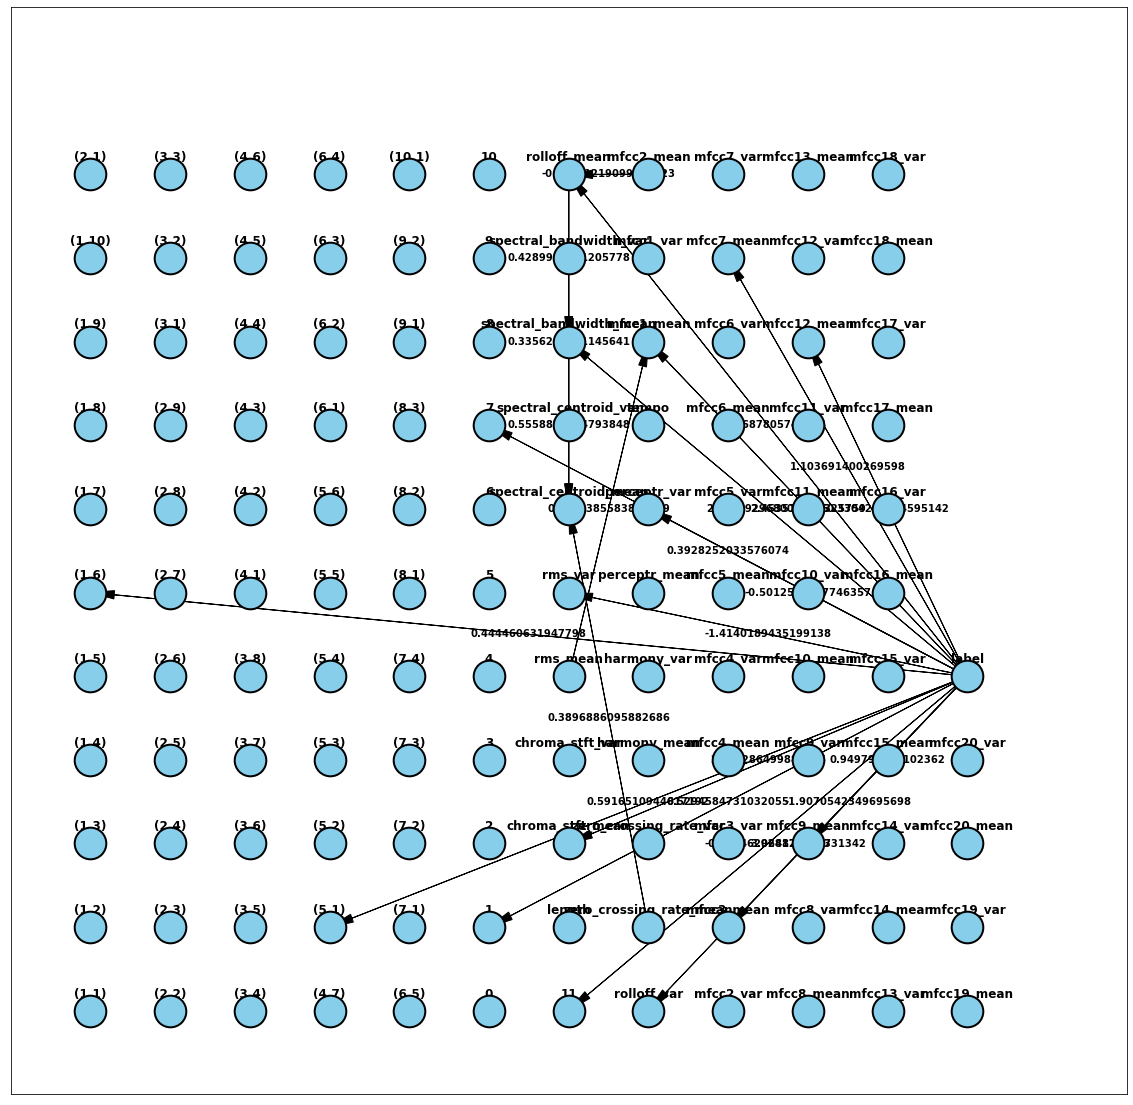

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_weighted_dag(weighted_adj_matrix, feature_names):
    # Get the number of nodes
    num_nodes = len(weighted_adj_matrix)

    # Set the figure size
    plt.figure(figsize=(20, 20))

    # Generate positions for nodes
    x = int(np.sqrt(num_nodes)) 
    positions = np.array([(i //x, i % x) for i in range(num_nodes)])

    # Draw nodes
    #plt.scatter(positions[:, 0], positions[:, 1], s=1000, c='skyblue', edgecolors='black', linewidths=2, zorder=5)
    for i, pos in enumerate(positions):
        plt.scatter(pos[0], pos[1], s=1000, c='skyblue', edgecolors='black', linewidths=2, zorder=5)
        plt.text(pos[0], pos[1]+.2, feature_names[i], ha='center', va='center', fontsize=12, fontweight='bold')

    # Draw edges with weights
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = weighted_adj_matrix[i][j]
            if weight != 0:
                plt.arrow(positions[j, 0], positions[j, 1], positions[i, 0] - positions[j, 0], positions[i, 1] - positions[j, 1],
                          head_width=0.1, head_length=0.3, fc='black', ec='black', length_includes_head=True, zorder=0)
                #plt.arrow(positions[i, 0], positions[i, 1], positions[j, 0] - positions[i, 0], positions[j, 1] - positions[i, 1],
                #          head_width=0.1, head_length=0.3, fc='black', ec='black', length_includes_head=True, zorder=0)
                label_position = (positions[i, 0] + positions[j, 0]) / 2, (positions[i, 1] + positions[j, 1]) / 2
                plt.text(label_position[0], label_position[1], str(weight), ha='center', va='center', fontsize=10, fontweight='bold')

    # Set axis limits and remove ticks
    plt.xlim(-1, 1*x+2)
    plt.ylim(-1, x+1)
    plt.xticks([])
    plt.yticks([])

    # Show the plot
    plt.show()

# Replace this with your own weighted adjacency matrix
# Example matrix:
weighted_adj_matrix = np.array([[0, 1, 0, 0],
                                [0, 0, 1, 0],
                                [0, 0, 0, 1],
                                [0, 0, 0, 0]])

# Call the function to plot the weighted DAG
feature_names = np.array(np.append(features_df.columns[:],["label"]))
print(feature_names)
plot_weighted_dag(W_est, feature_names)


In [9]:
copy_of_w_est = W_est.copy()

In [10]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
model = BayesianNetwork()
model.add_nodes_from(feature_names)
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        if W_est[i][j] != 0:
            model.add_edge(feature_names[j], feature_names[i])

In [11]:
# perhaps random_cpds helps -baseline accuracy: 0.38
#model.get_random_cpds(5, inplace=True)
np.unique(features_df["(1,1)"])
type(normalized_features)

numpy.ndarray

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
#X = normalized_features
print(normalized_features.shape)
disc = KBinsDiscretizer(n_bins=5, encode='ordinal')
disc.fit(normalized_features)
disc_features = disc.transform(normalized_features)
print(disc_features.shape)
X =np.concatenate((disc_features, numeric_labels.reshape(-1, 1)), axis = 1)
data= pd.DataFrame(X, columns=feature_names)
#print(data)

(7994, 125)
(7994, 125)


C:\Users\Julius Gorton\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Julius Gorton\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Julius Gorton\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Julius Gorton\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Julius Gorton\anaconda3\lib\sit

In [13]:
X_train, X_test, y_train, y_test = next(utils.n_fold_cv.n_fold_cv(disc_features, numeric_labels, counts_dict))
X_train_temp =np.concatenate((X_train, y_train.reshape(-1, 1)), axis = 1)
print(X_train.shape)
print(feature_names.shape)
X_train_df= pd.DataFrame(X_train_temp, columns=feature_names)
X_test= pd.DataFrame(X_test, columns=feature_names[:-1])

(6395, 125)
(126,)


In [14]:
model.fit(X_train_df)


In [15]:
model.get_cpds()

[<TabularCPD representing P((1,1):4) at 0x173f84968e0>,
 <TabularCPD representing P((1,2):2) at 0x173f84968b0>,
 <TabularCPD representing P((1,3):2) at 0x173f8496a60>,
 <TabularCPD representing P((1,4):2) at 0x173f8496ac0>,
 <TabularCPD representing P((1,5):2) at 0x173f8496be0>,
 <TabularCPD representing P((1,6):2 | label:10) at 0x173f84963d0>,
 <TabularCPD representing P((1,7):2) at 0x173f8496fd0>,
 <TabularCPD representing P((1,8):1) at 0x173f8496700>,
 <TabularCPD representing P((1,9):1) at 0x173f84969d0>,
 <TabularCPD representing P((1,10):1) at 0x173f8496f70>,
 <TabularCPD representing P((2,1):2) at 0x173f8496730>,
 <TabularCPD representing P((2,2):1) at 0x173f8496b80>,
 <TabularCPD representing P((2,3):2) at 0x173f8496ee0>,
 <TabularCPD representing P((2,4):1) at 0x173f8496c10>,
 <TabularCPD representing P((2,5):2) at 0x173f84967c0>,
 <TabularCPD representing P((2,6):1) at 0x173f8496d30>,
 <TabularCPD representing P((2,7):1) at 0x173f8496b20>,
 <TabularCPD representing P((2,8):1)

In [16]:
X_test

,"(1,1)","(1,2)","(1,3)","(1,4)","(1,5)","(1,6)","(1,7)","(1,8)","(1,9)","(1,10)",...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0
1,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0
2,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0
3,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,2.0,3.0,3.0,2.0,4.0,2.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0
1595,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,2.0,1.0
1596,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0
1597,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0


In [17]:

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, np.array(y_pred))
print(accuracy)

  0%|          | 0/1596 [00:00<?, ?it/s]

0.4790494058786742


  0%|          | 0/1596 [00:00<?, ?it/s]

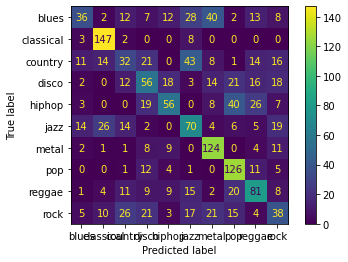

0.4790494058786742


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()

plt.show()
print(accuracy_score(y_test, y_pred))